In [ ]:
!pip install pdfplumber
!pip install vaderSentiment

 ## Extract Text from the script

In [3]:
import pdfplumber
import os

# Function to extract text from a single PDF
def extract_text_from_pdf(pdf_file):0
    with pdfplumber.open(pdf_file) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Directory containing all the PDFs (set to the current directory)
pdf_directory = "./"  

# List to store the extracted text from all PDFs
all_texts = {}

# Loop through all files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):  # Only process PDF files
        file_path = os.path.join(pdf_directory, filename)
        print(f"Extracting text from: {filename}")
        text = extract_text_from_pdf(file_path)
        all_texts[filename] = text  # Store the extracted text in a dictionary

# Example: Print the first 1000 characters of the first script
first_script = list(all_texts.values())[0]
print(first_script[:1000])


Extracting text from: 2001_A_SPACE_ODYSSEY_-_Pink_Revision.pdf
Extracting text from: AD_ASTRA.pdf
Extracting text from: ALIEN.pdf
Extracting text from: ARRIVAL.pdf
Extracting text from: AVATAR.pdf
Extracting text from: Avengers_Endgame.pdf
Extracting text from: A_Quiet_Place.pdf
Extracting text from: BACK_TO_THE_FUTURE.pdf
Extracting text from: BLACK_PANTHER.pdf
Extracting text from: BLADE_RUNNER.pdf
Extracting text from: Blade_Runner_2049.pdf
Extracting text from: DONNIE_DARKO.pdf
Extracting text from: Dredd.pdf
Extracting text from: Eternal_Sunshine_of_the_Spotless_Mind.pdf
Extracting text from: Everything_Everywher_All_At_Once.pdf
Extracting text from: Ex_Machina.pdf
Extracting text from: GHOSTBUSTERS.pdf
Extracting text from: Gravity.pdf
Extracting text from: GUARDIANS_OF_THE_GALAXY_VOL.pdf
Extracting text from: Her.pdf
Extracting text from: Inception.pdf
Extracting text from: INTERSTELLAR.pdf
Extracting text from: Iron_Man_Full_Script.pdf
Extracting text from: JURASSIC_PARK_-_Gree

 ## Preprocess and Clean the Extracted Text 

In [6]:
import re

def clean_script_text(text):
    # Remove scene headers (e.g., "INT. ORION-III PASSENGER AREA")
    text = re.sub(r'\b(INT\.|EXT\.)[A-Z\s\d-]+\d{1,2}', '', text)
    
    # Remove character names in all caps (optional)
    text = re.sub(r'\b[A-Z]+\b', '', text)
    
    # Remove other unwanted elements (e.g., stage directions in parentheses)
    text = re.sub(r'\(.*?\)', '', text)
    
    return text

# Apply cleaning to all scripts
cleaned_texts = {filename: clean_script_text(text) for filename, text in all_texts.items()}


## Extract Specific Sections for Analysis

In [8]:
# Print available keys (filenames) to ensure the right one is used
print(future_world_texts.keys())


dict_keys(['2001_A_SPACE_ODYSSEY_-_Pink_Revision.pdf', 'AD_ASTRA.pdf', 'ALIEN.pdf', 'ARRIVAL.pdf', 'AVATAR.pdf', 'Avengers_Endgame.pdf', 'A_Quiet_Place.pdf', 'BACK_TO_THE_FUTURE.pdf', 'BLACK_PANTHER.pdf', 'BLADE_RUNNER.pdf', 'Blade_Runner_2049.pdf', 'DONNIE_DARKO.pdf', 'Dredd.pdf', 'Eternal_Sunshine_of_the_Spotless_Mind.pdf', 'Everything_Everywher_All_At_Once.pdf', 'Ex_Machina.pdf', 'GHOSTBUSTERS.pdf', 'Gravity.pdf', 'GUARDIANS_OF_THE_GALAXY_VOL.pdf', 'Her.pdf', 'Inception.pdf', 'INTERSTELLAR.pdf', 'Iron_Man_Full_Script.pdf', 'JURASSIC_PARK_-_Green_Revision.pdf', 'Logan.pdf', 'NIGHT_OF_THE_LIVING_DEAD.pdf', 'Star_Wars_A_New_Hope.pdf', 'Star_Wars_The_Force_Awakens.pdf', 'Terminator.pdf', 'Terminator_2_Judgment_Day.pdf', 'The_Avengers.pdf', 'THE_FIFTH_ELEMENT.pdf', 'THE_FLY.pdf', 'The_Martian.pdf', 'The_Matrix_Full_Script.pdf', 'THE_POSTMAN.pdf', 'THE_PREDATOR.pdf', 'THE_TRUMAN_SHOW.pdf', 'Thor_Ragnarok.pdf', 'WAR_FOR_THE_PLANET_OF_THE_APES.pdf'])


In [23]:
def extract_future_world_sections(text):
    # Comprehensive list of futuristic keywords
    keywords = [
        "AI", "artificial intelligence", "robot", "cybernetics", "quantum computing", "virtual reality", "hologram",
        "space", "spaceship", "colonization", "Mars", "moon", "warp drive", "interstellar", "black hole", 
        "dystopia", "utopia", "post-apocalyptic", "surveillance", "cyberpunk", "genetic engineering", 
        "mutants", "cryogenics", "megacity", "immortality", "superhuman", "clones", "telepathy", 
        "alien", "extraterrestrial", "first contact", "terraforming", "fusion energy", 
        "environmental collapse", "laser weapon", "cyberwarfare"
    ]
    
    # Create a regex pattern that captures up to 300 characters before and after the keyword
    # Use non-capturing groups (?: ...) for keywords to avoid capturing only the keyword
    pattern = r'(?i).{0,500}\b(?:' + '|'.join(keywords) + r')\b.{0,300}'
    
    # Extract sections that contain the keywords
    future_world_sections = re.findall(pattern, text)
    
    # Join all sections into a single string to analyze or store
    return ' '.join(future_world_sections)



In [25]:
# Apply extraction to all cleaned texts
future_world_texts = {filename: extract_future_world_sections(text) for filename, text in cleaned_texts.items()}

# Example: Print the first 1000 characters from one script
first_script_key = next(iter(future_world_texts))  # Get the first script key
print(f"Script: {first_script_key}")
print(future_world_texts[first_script_key][:5000])  # Print first 5000 characters


Script: 2001_A_SPACE_ODYSSEY_-_Pink_Revision.pdf
Over the valley, a full moon rises, and a cold wind blows interest to the Moon, and though he could not remember it, But no Utopia is perfect, and this one had two blemishes. The The raw sunlight of space dazzles from the polished metal space station. The Co-Pilot in radio communication with the space station. initial. For example: Moon, Moon, American, Floyd, Heywood, . inherent in space travel and an. the Space Carrier to advise you Moon or en route to the Moon. 'm at Space Station Five, darling. from the moon. We've just spent up to the moon Earth much smaller than as seen from space station. standard Space-Station-to-Lunar enjoying the wonders of Space. returning Mars flight. Moon very large. but not death, for the Moon had The crew and docking control people on the moon go through the Moon was undoubtedly the low All in space suits minus helmets. The photographs are taken from a satellite of the Moon's Mars photos. small figures in 

 ## Sentiment Analysis of Extracted Text

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to all future world texts
sentiment_scores = {filename: analyze_sentiment(text) for filename, text in future_world_texts.items()}

# Example: Print sentiment scores for one script
print(sentiment_scores['GUARDIANS_OF_THE_GALAXY_VOL.pdf'])
print(sentiment_scores['WAR_FOR_THE_PLANET_OF_THE_APES.pdf'])

{'neg': 0.06, 'neu': 0.878, 'pos': 0.062, 'compound': -0.2566}
{'neg': 0.076, 'neu': 0.859, 'pos': 0.064, 'compound': -0.2244}


 ## Aggregate and Analyze Sentiment

In [32]:
import pandas as pd

# Create a DataFrame to store sentiment results
df_sentiment = pd.DataFrame.from_dict(sentiment_scores, orient='index')

# Add a column for overall sentiment classification
df_sentiment['overall_sentiment'] = df_sentiment['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Example: Display the first few sentiment results
print(df_sentiment.head())
print(df_sentiment)

                                            neg    neu    pos  compound  \
2001_A_SPACE_ODYSSEY_-_Pink_Revision.pdf  0.059  0.887  0.054    0.0436   
AD_ASTRA.pdf                              0.047  0.903  0.051   -0.7092   
ALIEN.pdf                                 0.044  0.914  0.042   -0.2023   
ARRIVAL.pdf                               0.045  0.927  0.028   -0.3376   
AVATAR.pdf                                0.027  0.933  0.040    0.5106   

                                         overall_sentiment  
2001_A_SPACE_ODYSSEY_-_Pink_Revision.pdf           Neutral  
AD_ASTRA.pdf                                      Negative  
ALIEN.pdf                                         Negative  
ARRIVAL.pdf                                       Negative  
AVATAR.pdf                                        Positive  
                                             neg    neu    pos  compound  \
2001_A_SPACE_ODYSSEY_-_Pink_Revision.pdf   0.059  0.887  0.054    0.0436   
AD_ASTRA.pdf                   

 ## Visualize Sentiment Trends

C:\Users\JZL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


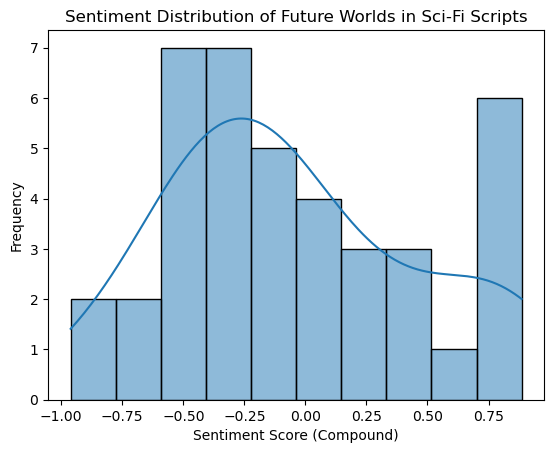

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution (compound scores)
sns.histplot(df_sentiment['compound'], bins=10, kde=True)
plt.title('Sentiment Distribution of Future Worlds in Sci-Fi Scripts')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.show()


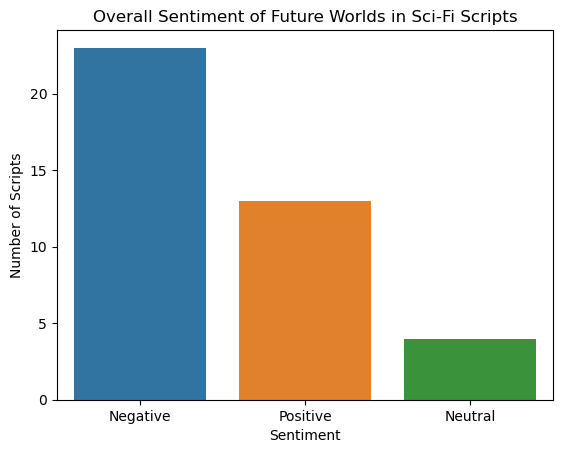

In [30]:
# Count the number of scripts with positive, negative, and neutral sentiment
sentiment_counts = df_sentiment['overall_sentiment'].value_counts()

# Plot a bar chart of sentiment counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Overall Sentiment of Future Worlds in Sci-Fi Scripts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Scripts')
plt.show()
